In [1]:
import numpy as np
import torch
from hopfield_network import HopfieldNetwork, compute_relative_dissimilarity
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"




n_neurons = 400
device = "cuda" if torch.cuda.is_available() else "cpu"


pattern_range = np.linspace(10, 400, 10, dtype=int)   # 记忆模式规模
mask_range = np.linspace(0.0, 0.9, 20)      # 掩码比例


results = np.zeros((len(pattern_range), len(mask_range)))

for i, n_patterns in enumerate(pattern_range):
    # 生成模式
    patterns = torch.randint(0, 2, (n_patterns, n_neurons), device=device) * 2 - 1
    patterns = patterns.float()
    # 训练 Hopfield
    net = HopfieldNetwork(n_neurons, device)
    net.store_patterns(patterns)

    for j, m in enumerate(mask_range):
        rel_diss = compute_relative_dissimilarity(net, patterns, mask_ratio=m)
        results[i, j] = rel_diss  # 存储相对不相似度


In [ ]:
import plotly.graph_objects as go
import numpy as np


X, Y = np.meshgrid(mask_range, pattern_range)
Z = results

fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale="Viridis")])

fig.update_layout(
    scene=dict(
        xaxis_title="掩码比例",
        yaxis_title="记忆模式数量",
        zaxis_title="相对不相似度"
    ),
    width=800,
    height=600,
)

fig.show()


Testing 10 patterns ...
Testing 30 patterns ...
Testing 51 patterns ...
Testing 71 patterns ...
Testing 92 patterns ...
Testing 112 patterns ...
Testing 133 patterns ...
Testing 153 patterns ...
Testing 174 patterns ...
Testing 194 patterns ...
Testing 215 patterns ...
Testing 235 patterns ...
Testing 256 patterns ...
Testing 276 patterns ...
Testing 297 patterns ...
Testing 317 patterns ...
Testing 338 patterns ...
Testing 358 patterns ...
Testing 379 patterns ...
Testing 400 patterns ...


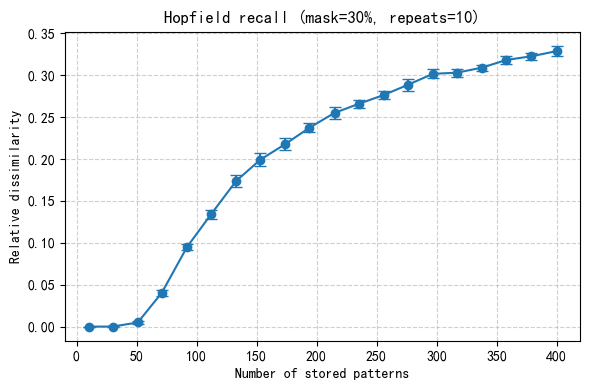

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from hopfield_network import HopfieldNetwork, compute_relative_dissimilarity
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


n_neurons = 400
mask_ratio = 0.3
pattern_range = np.linspace(10, 400, 20, dtype=int)
device = "cuda" if torch.cuda.is_available() else "cpu"
n_repeat = 10  # 每个条件重复次数

results = np.zeros((len(pattern_range), n_repeat))


for i, n_patterns in enumerate(pattern_range):
    print(f"Testing {n_patterns} patterns ...")
    for r in range(n_repeat):
        # 生成随机模式
        patterns = (torch.randint(0, 2, (n_patterns, n_neurons), device=device) * 2 - 1).float()
        net = HopfieldNetwork(n_neurons, device)
        net.store_patterns(patterns)

        # 计算一次相对不相似度
        rel_diss = compute_relative_dissimilarity(net, patterns, mask_ratio=mask_ratio)
        results[i, r] = rel_diss

# 平均和标准差
mean_rel = results.mean(axis=1)
std_rel = results.std(axis=1)


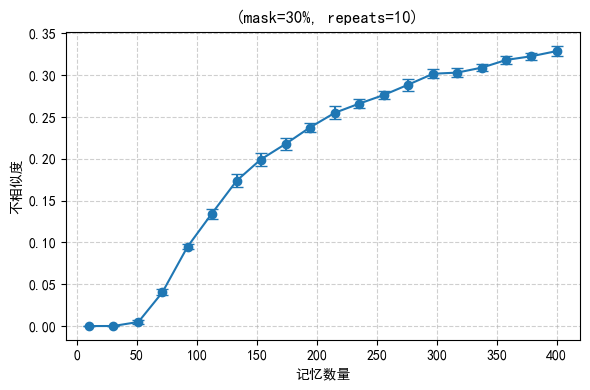

In [10]:


plt.figure(figsize=(6,4))
plt.errorbar(pattern_range, mean_rel, yerr=std_rel, fmt='o-', capsize=4)
plt.xlabel("记忆数量")
plt.ylabel("不相似度")
plt.title(f" (mask={mask_ratio*100:.0f}%, repeats={n_repeat})")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
